Importer librairies
importer fichiers csv train.set et validation.set

Créer source et dataset

Splitter le train.set de 10% en 10% (0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9)
entrainer le modèle sur ces train.set.splitter
faire les prédictions avec le validation.set

calculer accuracy et AUC pour tous ces cas

In [19]:
from bigml.api import BigML
from pandas import read_csv
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import json

# train_set = read_csv('csv_file/train_set.csv')
# validation_set = read_csv('csv_file/validation_set.csv')

api = BigML(project='project/5d94a454eba31d46690001d1')

In [4]:
#Train_set
# Creation d'une source
train_source = api.create_source('csv_file/train_set.csv')
api.ok(train_source)
# Creation d'un dataset ( = source )
train_dataset = api.create_dataset(train_source)
api.ok(train_dataset)

True

In [5]:
# Validation_set
# Creation d'une source
validation_source = api.create_source('csv_file/validation_set.csv')
api.ok(validation_source)
# Creation d'un dataset ( = source )
validation_dataset = api.create_dataset(validation_source)
api.ok(validation_dataset)

True

In [20]:
def split_train(split_rate):
    train_split_set = api.create_dataset(train_dataset,{"name": "train_split_set", "sample_rate": split_rate, "seed": "my seed"})
    api.ok(train_split_set)
    return train_split_set

train_10 = split_train(10/100)
train_20 = split_train(20/100)
train_30 = split_train(30/100)
train_40 = split_train(40/100)
train_50 = split_train(50/100)
train_60 = split_train(60/100)
train_70 = split_train(70/100)
train_80 = split_train(80/100)
train_90 = split_train(90/100)
train_100 = split_train(100/100)

In [ ]:
def model_ensemble(dataset):
    ensemble = api.create_ensemble(dataset,{"objective_field" : "SeriousDlqin2yrs"})
    api.ok(ensemble)
    return ensemble
    
ensemble_train_10 = model_ensemble(train_10)
ensemble_train_20 = model_ensemble(train_20)
ensemble_train_30 = model_ensemble(train_30)
ensemble_train_40 = model_ensemble(train_40)
ensemble_train_50 = model_ensemble(train_50)
ensemble_train_60 = model_ensemble(train_60)
ensemble_train_70 = model_ensemble(train_70)
ensemble_train_80 = model_ensemble(train_80)
ensemble_train_90 = model_ensemble(train_90)
ensemble_train_100 = model_ensemble(train_100)

In [ ]:
def model_deepnet(dataset):
    deepnet = api.create_deepnet(dataset, {"objective_field" : "SeriousDlqin2yrs"})
    api.ok(deepnet)
    return deepnet

deepnet_train_10 = model_deepnet(train_10)
deepnet_train_20 = model_deepnet(train_20)
deepnet_train_30 = model_deepnet(train_30)
deepnet_train_40 = model_deepnet(train_40)
deepnet_train_50 = model_deepnet(train_50)
deepnet_train_60 = model_deepnet(train_60)
deepnet_train_70 = model_deepnet(train_70)
deepnet_train_80 = model_deepnet(train_80)
deepnet_train_90 = model_deepnet(train_90)
deepnet_train_100 = model_deepnet(train_100)

In [ ]:
def batch_prediction(model, dataset):
     batch_prediction = api.create_batch_prediction(model, dataset,{"header": True, 
                                                                    "all_fields": True, 
                                                                    "prediction_name": "my_prediction", 
                                                                    "probabilities": True})
    api.ok(batch_prediction)
    return batch_prediction

In [ ]:
def calcul_auc(file_csv):
    actual = file_csv['SeriousDlqin2yrs']
    scores = file_csv['1 probability']
    auc = np.float64(roc_auc_score(actual, scores))
    return np.float64(auc)



In [ ]:
def create_plot(list1, list2, list3):
    plt.xlabel("Taille Data en %")
    plt.ylabel("Performance : AUC")
    plt.title("GiveMeCredit - LearningCurves")
    plt.axhline(y=0.87)
    plt.ylim(0.8,1)
    plt.plot(list1, list2, label=)
    plt.plot(list1, list3, label=)

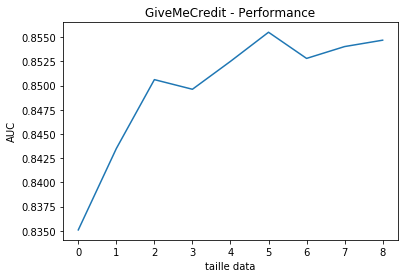

In [22]:
def calcul_auc(split_rate):    
#     train_split_set = api.create_dataset(train_dataset,{"name": "train_split_set", "sample_rate": split_rate, "seed": "my seed"})
#     api.ok(train_split_set)
    
#     ensemble = api.create_ensemble(train_split_set, {"objective_field" : "SeriousDlqin2yrs"})
#     api.ok(ensemble)
    
#     batch_prediction_validation_set_split = api.create_batch_prediction(ensemble, validation_dataset,{"header": True, 
#                                                                                                             "all_fields": True,
#                                                                                                             "prediction_name": "my_prediction", 
#                                                                                                             "probabilities": True})
#     api.ok(batch_prediction_validation_set_split)
    
    api.download_batch_prediction(batch_prediction_validation_set_split,filename='BatchPrediction/Validation_set_pred_split.csv')
    
    pred_split = read_csv('BatchPrediction/Validation_set_pred_split.csv', index_col = 0)

    actual = pred_split['SeriousDlqin2yrs']
    scores = pred_split['1 probability']
    auc = np.float64(roc_auc_score(actual, scores))

    return np.float64(auc)

table = [calcul_auc(n/10) for n in range(1,10)]

plt.xlabel("taille data")
plt.ylabel("AUC")
plt.title("GiveMeCredit - Performance")
plt.axhline(y=0.87)
plt.ylim(0.8,1)
plt.plot(table)

0.8325178190549616
0.8323794961054553
0.8449961185339008
0.8343984968906153
0.850094445313889
0.8376676090656506
0.8525970976121113
0.8413658681915295
0.8519661498915361
0.8420177860259241
0.8535271687109941
0.833905650448153
0.8538284290015346
0.8398904322636506
0.8535400522523808
0.8413518496926082
0.8555772566923702
0.8400786312766809
0.855822744460321
0.8361525737600477


AttributeError: module 'matplotlib.pyplot' has no attribute 'axh'

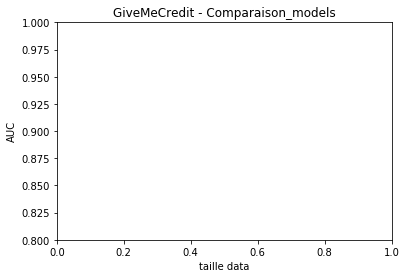

In [6]:
def comparaison_models(split_rate):
    train_split_set = api.create_dataset(train_dataset,{"name": "train_split_set", "sample_rate": split_rate, "seed": "my seed"})
    api.ok(train_split_set)
    
    ensemble = api.create_ensemble(train_split_set, {"objective_field" : "SeriousDlqin2yrs"})
    api.ok(ensemble)
    
    batch_prediction_val_set_split_ensemble = api.create_batch_prediction(ensemble, validation_dataset,{"header": True, 
                                                                                                        "all_fields": True,
                                                                                                        "prediction_name": "my_prediction", 
                                                                                                        "probabilities": True})
    api.ok(batch_prediction_val_set_split_ensemble)
    
    api.download_batch_prediction(batch_prediction_val_set_split_ensemble,filename='BatchPrediction/Val_set_pred_split_ensemble.csv')
    
    pred_split_ensemble = read_csv('BatchPrediction/Val_set_pred_split_ensemble.csv', index_col = 0)

    actual_e = pred_split_ensemble['SeriousDlqin2yrs']
    scores_e = pred_split_ensemble['1 probability']
    auc_ensemble = np.float64(roc_auc_score(actual_e, scores_e))
    print (auc_ensemble)
    
    
    deepnet = api.create_deepnet(train_split_set, {"objective_field" : "SeriousDlqin2yrs"})
    api.ok(deepnet)
    
    batch_prediction_val_set_split_deepnet = api.create_batch_prediction(deepnet, validation_dataset,{"header": True, 
                                                                                                      "all_fields": True,
                                                                                                      "prediction_name": "my_prediction", 
                                                                                                      "probabilities": True})
    api.ok(batch_prediction_val_set_split_deepnet)
    
    api.download_batch_prediction(batch_prediction_val_set_split_deepnet,filename='BatchPrediction/Val_set_pred_split_deepnet.csv')
    
    pred_split_deepnet = read_csv('BatchPrediction/Val_set_pred_split_deepnet.csv', index_col = 0)

    actual_d = pred_split_deepnet['SeriousDlqin2yrs']
    scores_d = pred_split_deepnet['1 probability']
    auc_deepnet = np.float64(roc_auc_score(actual_d, scores_d))
    print (auc_deepnet)
    
    return np.float64(auc_ensemble), np.float64(auc_deepnet)


table = [comparaison_models(n/10) for n in range(1,11)]

plt.xlabel("taille data")
plt.ylabel("AUC")
plt.title("GiveMeCredit - Comparaison_models")
plt.ylim(0.8,1)
plt.axhline(y=0.87)
plt.plot(table)

In [ ]:
def train_vs_validation(split_rate):  
    train_split_set = api.create_dataset(train_dataset,{"name": "train_split_set", "sample_rate": split_rate, "seed": "my seed"})
    api.ok(train_split_set)
    
    ensemble = api.create_ensemble(train_split_set, {"objective_field" : "SeriousDlqin2yrs"})
    api.ok(ensemble)
    
    batch_prediction_train_split_set_ensemble = api.create_batch_prediction(ensemble, train_split_set,{"header": True, 
                                                                                                       "all_fields": True,
                                                                                                       "prediction_name": "my_prediction", 
                                                                                                       "probabilities": True})
    api.ok(batch_prediction_train_split_set_ensemble)
    
    api.download_batch_prediction(batch_prediction_train_split_set_ensemble,filename='BatchPrediction/Train_split_set_pred_ensemble.csv')
    
    pred_ensemble_t = read_csv('BatchPrediction/Train_split_set_pred_ensemble.csv', index_col = 0)

    actual_e_t = pred_ensemble_t['SeriousDlqin2yrs']
    scores_e_t = pred_ensemble_t['1 probability']
    auc_ensemble_t = np.float64(roc_auc_score(actual_e_t, scores_e_t))
    print (auc_ensemble_t)
    
    batch_prediction_val_set_split_ensemble = api.create_batch_prediction(ensemble, validation_dataset,{"header": True, 
                                                                                                        "all_fields": True,
                                                                                                        "prediction_name": "my_prediction", 
                                                                                                        "probabilities": True})
    api.ok(batch_prediction_val_set_split_ensemble)
    
    api.download_batch_prediction(batch_prediction_val_set_split_ensemble,filename='BatchPrediction/Val_set_pred_split_ensemble.csv')
    
    pred_split_ensemble_v = read_csv('BatchPrediction/Val_set_pred_split_ensemble.csv', index_col = 0)

    actual_e_v = pred_split_ensemble_v['SeriousDlqin2yrs']
    scores_e_v = pred_split_ensemble_v['1 probability']
    auc_ensemble_v = np.float64(roc_auc_score(actual_e_v, scores_e_v))
    print (auc_ensemble_v)
    
    return np.float64(auc_ensemble_t), np.float64(auc_ensemble_v)


table = [train_vs_validation(n/10) for n in range(1,11)]

plt.xlabel("taille data")
plt.ylabel("AUC")
plt.title("GiveMeCredit - Train_vs_validation")
plt.ylim(0.8,1)
plt.axhline(y=0.87)
plt.plot(table)

In [ ]:
def train_vs_validation_d(split_rate):
    train_split_set = api.create_dataset(train_dataset,{"name": "train_split_set", "sample_rate": split_rate, "seed": "my seed"})
    api.ok(train_split_set)
    
    deepnet = api.create_deepnet(train_split_set, {"objective_field" : "SeriousDlqin2yrs"})
    api.ok(deepnet)
    
    batch_prediction_train_set_deepnet = api.create_batch_prediction(deepnet, train_split_set,{"header": True, 
                                                                                               "all_fields": True,
                                                                                               "prediction_name": "my_prediction", 
                                                                                               "probabilities": True})
    api.ok(batch_prediction_train_set_deepnet)
    
    api.download_batch_prediction(batch_prediction_train_set_deepnet,filename='BatchPrediction/Train_set_pred_deepnet.csv')
    
    pred_deepnet_t = read_csv('BatchPrediction/Train_set_pred_deepnet.csv', index_col = 0)

    actual_d_t = pred_deepnet_t['SeriousDlqin2yrs']
    scores_d_t = pred_deepnet_t['1 probability']
    auc_deepnet_t = np.float64(roc_auc_score(actual_d_t, scores_d_t))
    print (auc_deepnet_t)
    
    batch_prediction_val_set_split_deepnet = api.create_batch_prediction(deepnet, validation_dataset,{"header": True, 
                                                                                                      "all_fields": True,
                                                                                                      "prediction_name": "my_prediction", 
                                                                                                      "probabilities": True})
    api.ok(batch_prediction_val_set_split_deepnet)
    
    api.download_batch_prediction(batch_prediction_val_set_split_deepnet,filename='BatchPrediction/Val_set_pred_split_deepnet.csv')
    
    pred_split_deepnet_v = read_csv('BatchPrediction/Val_set_pred_split_deepnet.csv', index_col = 0)

    actual_d_v = pred_split_deepnet_v['SeriousDlqin2yrs']
    scores_d_v = pred_split_deepnet_v['1 probability']
    auc_deepnet_v = np.float64(roc_auc_score(actual_d_v, scores_d_v))
    print (auc_deepnet_v)
    
    return np.float64(auc_deepnet_t), np.float64(auc_deepnet_v)


table = [train_vs_validation_d(n/10) for n in range(1,11)]

plt.xlabel("taille data")
plt.ylabel("AUC")
plt.title("GiveMeCredit - Train_vs_validation")
plt.ylim(0.8,1)
plt.axhline(y=0.87)
plt.plot(table)